In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

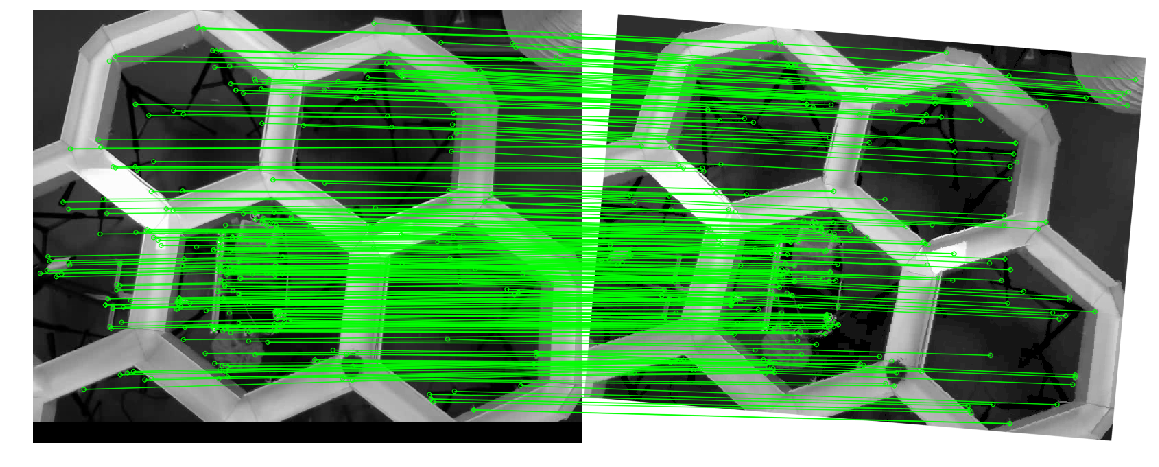

In [32]:
MIN_MATCH_COUNT = 100

img1 = cv2.imread('Homography_stuff/stand_0.png',0)          # queryImage
img2 = cv2.imread('Homography_stuff/stand_0_skewed.png',0)             # trainImage

# Initiate SIFT detector

sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 20000)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []
# store all the good matches as per Lowe's ratio test.
for m,n in matches:
    if m.distance < 0.6*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

fig, ax = plt.subplots(1, 1, figsize = (20,20))
plt.imshow(img3, 'gray')
plt.axis('off');
plt.show()

In [30]:
print(M)

[[ 9.86006030e-01 -3.43413811e-02  2.06670817e+01]
 [ 3.36167702e-02  9.76472822e-01  3.25185123e-01]
 [-1.66243366e-06  1.02267961e-06  1.00000000e+00]]


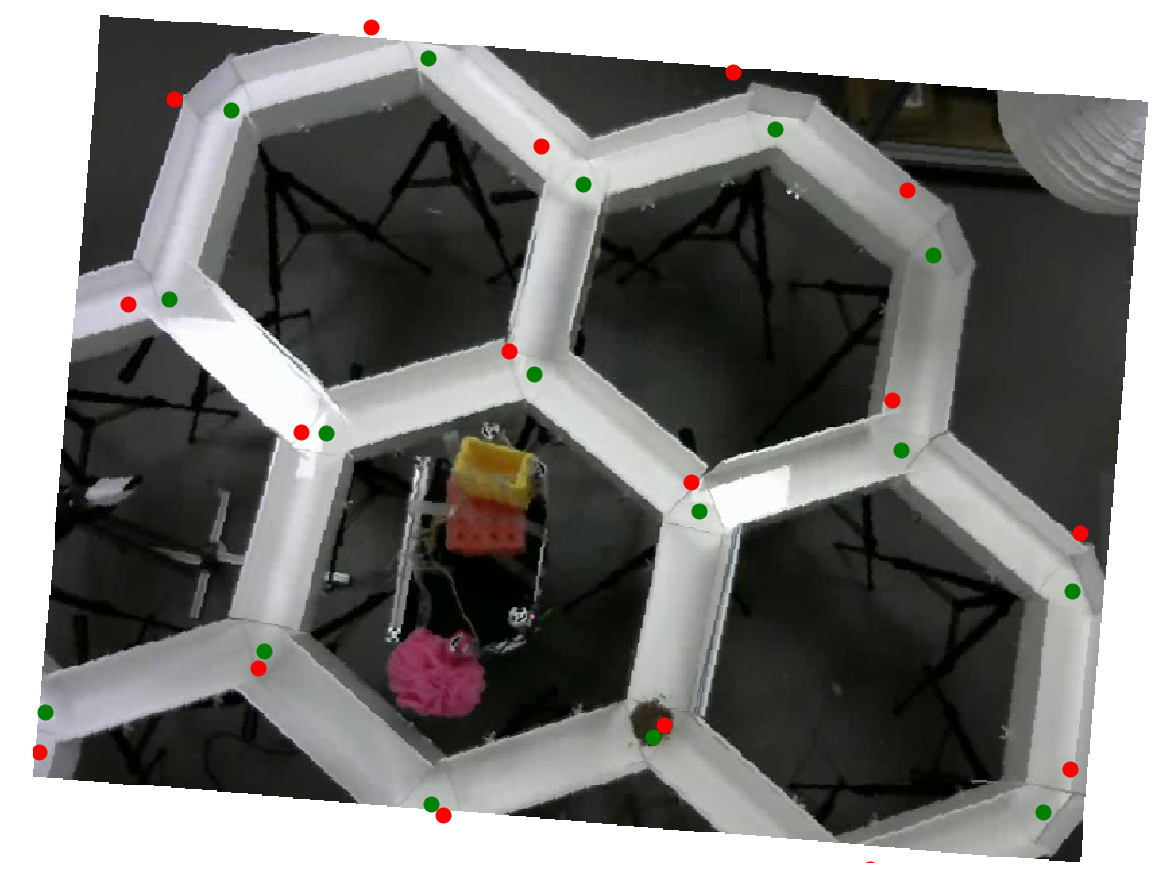

In [46]:
node_pos_top = np.genfromtxt('Homography_stuff/node_pos_top.csv', delimiter = ',', skip_header = True)[:,0:2]

pts = np.float32(node_pos_top).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts, M)

xs = dst[:,0,0]
ys = dst[:,0,1]

im_0 = plt.imread('Homography_stuff\stand_0_skewed.png')

fig, ax = plt.subplots(figsize = (20,20))
plt.plot(dst[:,0,0], dst[:,0,1], 'o', color = 'green', markersize = '15')
plt.plot(node_pos_top[:,0], node_pos_top[:,1], 'o', color = 'red', markersize = '15')
plt.imshow(im_0)

plt.axis('off');

plt.savefig('example_remapping.png', dpi=200)

plt.show()

In [1]:
MIN_MATCH_COUNT = 10

img1 = cv2.imread('im_1.png',0)          # queryImage
img2 = cv2.imread('im_11.png',0)         # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
print(good)


if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

fig, ax = plt.subplots(figsize = (20,20))
ax.set_title('Homography matches', fontsize = 20)
plt.imshow(img3, 'gray'),plt.show()

NameError: name 'cv2' is not defined

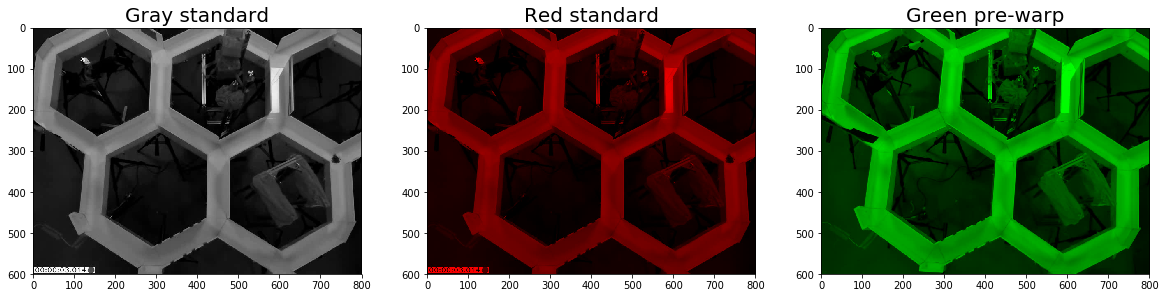

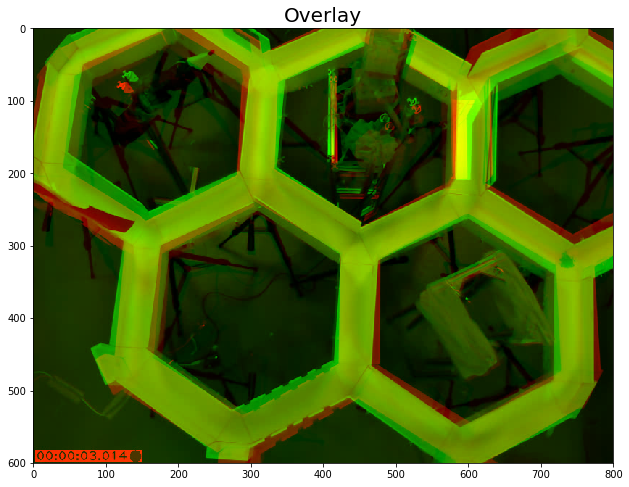

In [46]:
img1 = cv2.imread('im_1.png')
img2 = cv2.imread('im_11.png')

img1Gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2Gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

height, width = img1Gray.shape

out = cv2.warpPerspective(img1Gray, M, (width, height))

frame = np.zeros([600, 800, 3], dtype='uint8')
frame_img1_red = np.empty_like(frame)
frame_img1_red[:,:,0] = img1Gray

frame_img2_green = np.empty_like(frame)
frame_img2_green[:,:,1] = img2Gray

frame[:,:,0] = img1Gray
frame[:,:,1] = img2Gray
# frame[:,:,1] = out

fig, ax = plt.subplots(1, 3, figsize = (20,8))
ax[0].set_title('Gray standard', fontsize = 20)
ax[0].imshow(img1Gray, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Red standard', fontsize = 20)
ax[1].imshow(frame_img1_red)
ax[2].set_title('Green pre-warp', fontsize = 20)
ax[2].imshow(frame_img2_green)

fig, ax = plt.subplots(figsize = (20,8))
ax.set_title('Overlay', fontsize = 20)
ax.imshow(frame)

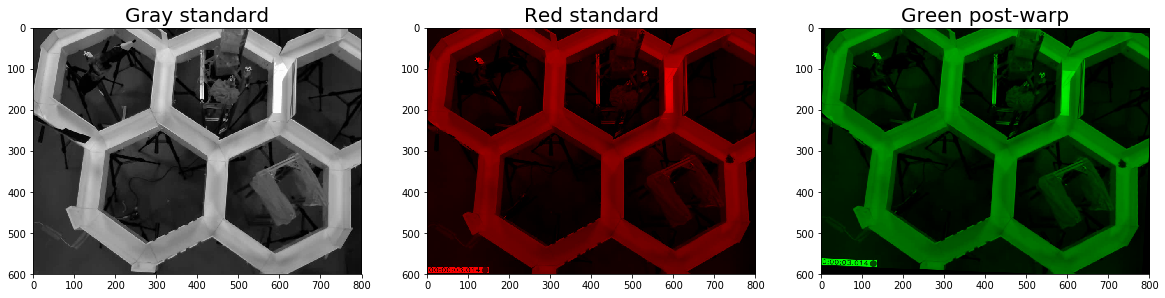

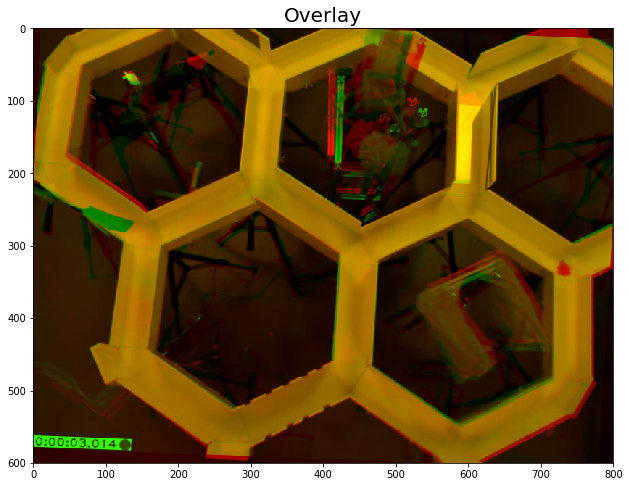

In [47]:
img1 = cv2.imread('im_1.png')
img2 = cv2.imread('im_11.png')

img1Gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2Gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

height, width = img1Gray.shape

out = cv2.warpPerspective(img1Gray, M, (width, height))

frame = np.zeros([height, width, 3], dtype='uint8')

frame_img2_red = np.empty_like(frame)
frame_img2_red[:,:,0] = img2Gray

frame_out_green = np.empty_like(frame)
frame_out_green[:,:,1] = out

frame[:,:,0] = img2Gray
frame[:,:,1] = out
# frame[:,:,1] = out

fig, ax = plt.subplots(1, 3, figsize = (20,8))
ax[0].set_title('Gray standard', fontsize = 20)
ax[0].imshow(img2Gray, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Red standard', fontsize = 20)
ax[1].imshow(frame_img1_red)
ax[2].set_title('Green post-warp', fontsize = 20)
ax[2].imshow(frame_out_green)

fig, ax = plt.subplots(figsize = (20,8))
ax.set_title('Overlay', fontsize = 20)
ax.imshow(frame)

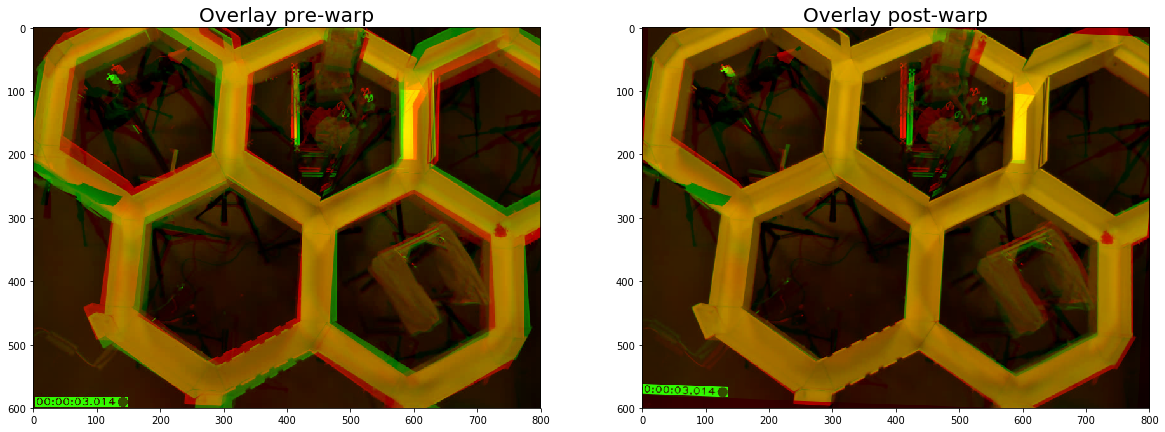

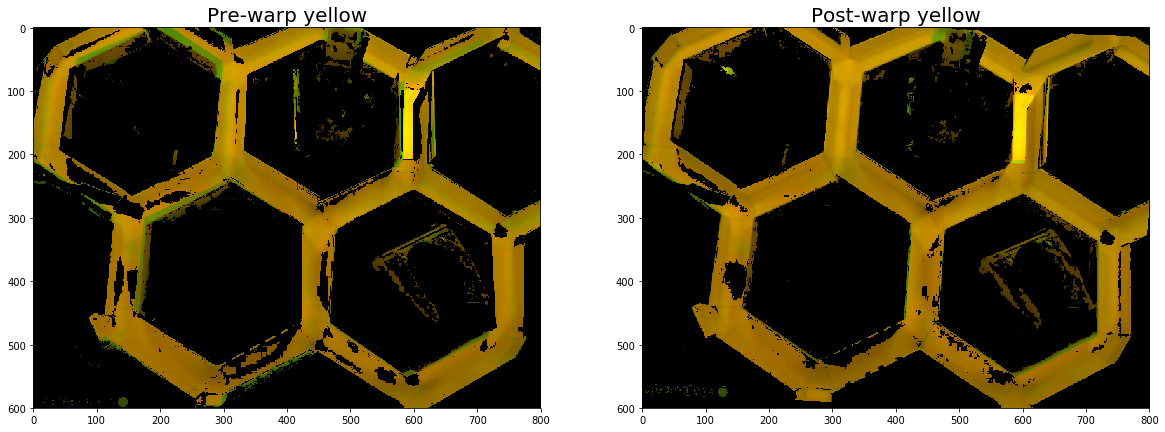

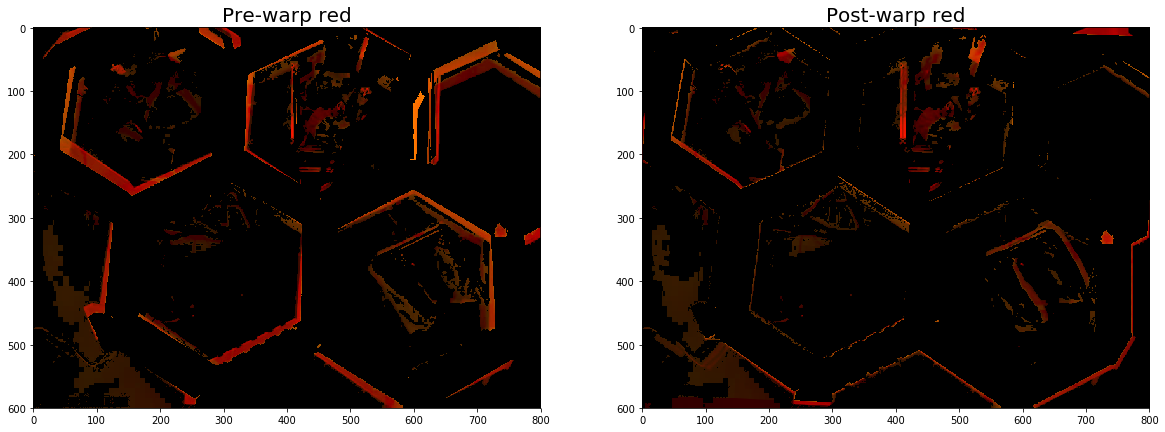

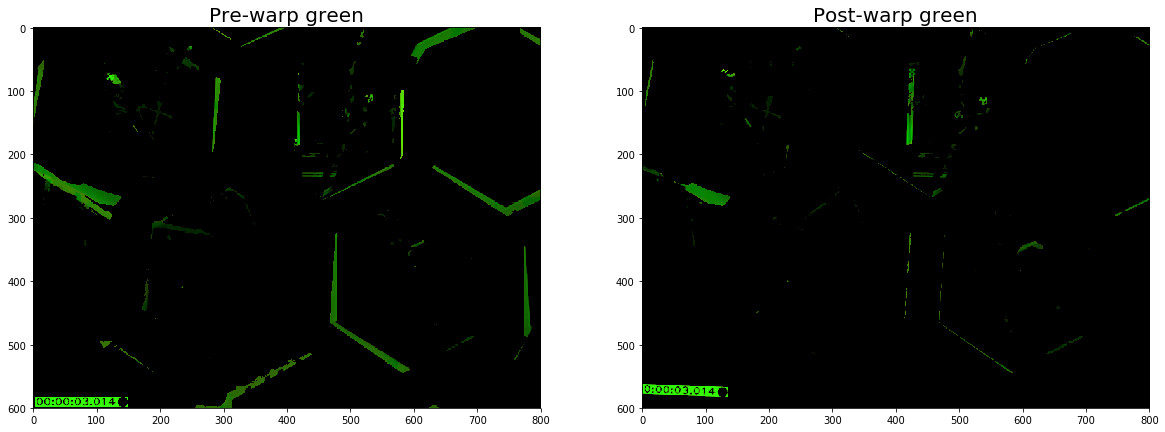

In [48]:
img1 = cv2.imread('im_1.png')
img2 = cv2.imread('im_11.png')

img1Gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2Gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

height, width = img1Gray.shape

out = cv2.warpPerspective(img1Gray, M, (width, height))

frame1 = np.zeros([height, width, 3], dtype='uint8')
frame2 = np.zeros_like(frame1)

frame1[:,:,0] = img2Gray
frame1[:,:,1] = img1Gray
# frame[:,:,1] = out

frame2[:,:,0] = img2Gray
frame2[:,:,1] = out

red_lower = np.array([0,100,50], 'uint8')
red_upper = np.array([15,255,255], 'uint8')

yellow_lower = np.array([20,60,65], 'uint8')
yellow_upper = np.array([45,255,255], 'uint8')

blue_lower = np.array([99,115,150], 'uint8')
blue_upper = np.array([110,255,255], 'uint8')

green_lower = np.array([45,50,30], 'uint8')
green_upper = np.array([60,255,255], 'uint8')

hsv1 = cv2.cvtColor(frame1,cv2.COLOR_RGB2HSV)
hsv2 = cv2.cvtColor(frame2,cv2.COLOR_RGB2HSV)

mask1_yellow = cv2.inRange(hsv1, yellow_lower, yellow_upper)
mask2_yellow = cv2.inRange(hsv2, yellow_lower, yellow_upper)

mask1_red = cv2.inRange(hsv1, red_lower, red_upper)
mask2_red = cv2.inRange(hsv2, red_lower, red_upper)

mask1_green = cv2.inRange(hsv1, green_lower, green_upper)
mask2_green = cv2.inRange(hsv2, green_lower, green_upper)

masked1_yellow = cv2.bitwise_and(frame1, frame1, mask = mask1_yellow)
masked1_red = cv2.bitwise_and(frame1, frame1, mask = mask1_red)
masked1_green = cv2.bitwise_and(frame1, frame1, mask = mask1_green)

masked2_yellow = cv2.bitwise_and(frame2, frame2, mask = mask2_yellow)
masked2_red = cv2.bitwise_and(frame2, frame2, mask = mask2_red)
masked2_green = cv2.bitwise_and(frame2, frame2, mask = mask2_green)

fig, ax = plt.subplots(1, 2, figsize = (20,10))
ax[0].set_title('Overlay pre-warp', fontsize = 20)
ax[0].imshow(frame1)
ax[1].set_title('Overlay post-warp', fontsize = 20)
ax[1].imshow(frame2)
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (20,10))
ax[0].set_title('Pre-warp yellow', fontsize = 20)
ax[0].imshow(masked1_yellow)
ax[1].set_title('Post-warp yellow', fontsize = 20)
ax[1].imshow(masked2_yellow)

fig, ax = plt.subplots(1, 2, figsize = (20,10))
ax[0].set_title('Pre-warp red', fontsize = 20)
ax[0].imshow(masked1_red)
ax[1].set_title('Post-warp red', fontsize = 20)
ax[1].imshow(masked2_red)
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (20,10))
ax[0].set_title('Pre-warp green', fontsize = 20)
ax[0].imshow(masked1_green)
ax[1].set_title('Post-warp green', fontsize = 20)
ax[1].imshow(masked2_green)
plt.show()

In [22]:
tot_pixels = 600*800

_, counts1_yellow = np.unique(masked1_yellow.reshape(-1, 3), axis=0, return_counts=True)
_, counts1_red = np.unique(masked1_red.reshape(-1, 3), axis=0, return_counts=True)
_, counts1_green = np.unique(masked1_green.reshape(-1, 3), axis=0, return_counts=True)

_, counts2_yellow = np.unique(masked2_yellow.reshape(-1, 3), axis=0, return_counts=True)
_, counts2_red = np.unique(masked2_red.reshape(-1, 3), axis=0, return_counts=True)
_, counts2_green = np.unique(masked2_green.reshape(-1, 3), axis=0, return_counts=True)

yellow1 = tot_pixels - counts1_yellow[0]
red1 = tot_pixels - counts1_red[0]
green1 = tot_pixels - counts1_green[0]

yellow2 = tot_pixels - counts2_yellow[0]
red2 = tot_pixels - counts2_red[0]
green2 = tot_pixels - counts2_green[0]

# print(yellow1, red1, green1)
# print(yellow2, red2, green2)

rat_ry1 = red1/yellow1
rat_ry2 = red2/yellow2

rat_gy1 = green1/yellow1
rat_gy2 = green2/yellow2

print(rat_ry1, rat_ry2)
print(rat_gy1, rat_gy2)

0.30604691225485914 0.16925495927937503
0.15944299499419526 0.04394284164078374
